# Daten laden

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import re
import numpy as np
import joblib

In [2]:
def extract_experiment_id(dateiname, kategorie):
    """Dient der Auslesung und der Rückgabe der Experimentsnummer aus dem Dateinamen"""
    if kategorie == "Gutschweißung":
        return dateiname[-10:-6]
    elif kategorie in [
        "Leitungsversatz/Schweißkurven",
        "Öl auf Terminal",
        "Sontrodeneinsätze gewechselt",
        "Terminalversatz",
    ]:
        match = re.match(r"(\d+)", dateiname)
        return match.group(1) if match else None
    return None


def read_data(ordnerpfad_versuche, kategorie_versuche, ordnerpfad_zugversuche):
    """Dient der Einlesung der Datensätze 'Zugfestigkeit' und der 'Experimente' und die beiden Dateien werden über die Experiment_ID verknüpft
    """
    datenliste = []
    datenliste_zugversuche = []

    for dateiname in os.listdir(ordnerpfad_versuche):
        if dateiname.endswith(".csv"):
            dateipfad = os.path.join(ordnerpfad_versuche, dateiname)
            try:
                df = pd.read_csv(dateipfad, skiprows=46, delimiter=";")
                experiment_id = extract_experiment_id(dateiname, kategorie_versuche)
                if experiment_id:
                    df["Experiment_ID"] = int(experiment_id)
                    datenliste.append(df)
            except Exception as e:
                print(f"Fehler beim Lesen der Datei {dateipfad}: {e}")

    if not datenliste:
        return pd.DataFrame()

    df_schweißung = pd.concat(datenliste, ignore_index=True)
    df_schweißung["Kategorie"] = kategorie_versuche

    for dateiname_zugversuche in os.listdir(ordnerpfad_zugversuche):
        if dateiname_zugversuche.endswith(".xlsx"):
            dateipfad = os.path.join(ordnerpfad_zugversuche, dateiname_zugversuche)
            try:
                df = pd.read_excel(dateipfad)
                datenliste_zugversuche.append(df)
            except Exception as e:
                print(f"Fehler beim Lesen der Datei {dateipfad}: {e}")

    if not datenliste_zugversuche:
        return df_schweißung

    df_zugversuche = pd.concat(datenliste_zugversuche, ignore_index=True)
    df_merged = pd.merge(
        df_schweißung,
        df_zugversuche,
        left_on="Experiment_ID",
        right_on="Schweißkurve",
        how="left",
    )

    return df_merged


ordnerpfad = "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Gutschweißungen/Schweißkurven (Maschinendaten)"
ordnerpfade = {
    "Gutschweißung": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Gutschweißungen/Schweißkurven (Maschinendaten)",
    "Leitungsversatz/Schweißkurven": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Nicht OK-Schweißungen - Leitungsversatz/Schweißkurven",
    "Öl auf Terminal": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Nicht OK-Schweißungen - Öl auf Terminal/Schweißkurven",
    "Sontrodeneinsätze gewechselt": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/(Nicht) OK-Schweißungen - Sontrodeneinsätze gewechselt/Schweißkurven",
    "Terminalversatz": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Nicht OK-Schweißungen - Terminalversatz/Schweißkurven",
}
ordnerpfade_ordnerpfad_zugversuche = {
    "Gutschweißung": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Gutschweißungen/Zugversuchsergebnisse",
    "Leitungsversatz/Schweißkurven": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Nicht OK-Schweißungen - Leitungsversatz/Zugversuche",
    "Öl auf Terminal": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Nicht OK-Schweißungen - Öl auf Terminal/Zugversuche",
    "Sontrodeneinsätze gewechselt": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/(Nicht) OK-Schweißungen - Sontrodeneinsätze gewechselt",
    "Terminalversatz": "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/Projekt_ML_USS/Rohdaten/Nicht OK-Schweißungen - Terminalversatz/Zugversuche",
}

df_complete = pd.DataFrame()
for key, path in ordnerpfade.items():
    df = read_data(path, key, ordnerpfade_ordnerpfad_zugversuche[key])
    df_complete = pd.concat([df_complete, df], ignore_index=True)
df_complete["Experiment_ID"] = df_complete["Experiment_ID"].astype("int")
df_complete.drop(["Schweißkurve"], inplace=True, axis=1)
display(df_complete.head())

,ms,Power[W],Force[N],Distance[mm],Experiment_ID,Kategorie,Zugfestigkeit
0,1,0.0,0.000,0.0,1626,Gutschweißung,2870.0
1,2,0.0,504.654,0.0,1626,Gutschweißung,2870.0
2,3,0.0,504.654,0.0,1626,Gutschweißung,2870.0
3,4,0.0,506.607,0.0,1626,Gutschweißung,2870.0
4,5,0.0,506.607,0.0,1626,Gutschweißung,2870.0


In [3]:
display(len(df_complete))

968335

In [11]:
df_test = df_complete.groupby("Experiment_ID", as_index=False).agg(Expirement_C=("Experiment_ID", "nunique"))

In [12]:
display(df_test)

,Experiment_ID,Expirement_C
0,1569,1
1,1570,1
2,1571,1
3,1572,1
4,1573,1
...,...,...
595,3024,1
596,3025,1
597,3026,1
598,3027,1


In [4]:
df_complete.columns = ["T", "P", "F", "D", "Experiment_ID", "Kategorie", "Z"]
df_agg = df_complete.groupby(["Kategorie", "Experiment_ID"], as_index=False).agg(
    P_mean=("P", "mean"),
    F_mean=("F", "mean"),
    D_mean=("D", "mean"),
    T_mean=("T", "mean"),
    Z_mean=("Z", "mean"),
    P_med=("P", "median"),
    F_med=("F", "median"),
    D_med=("D", "median"),
    T_med=("T", "median"),
    Z_med=("Z", "median"),
    P_std=("P", "std"),
    F_std=("F", "std"),
    D_std=("D", "std"),
    T_std=("T", "std"),
    Z_std=("Z", "std"),
    P_max=("P", "max"),
    F_max=("F", "max"),
    D_max=("D", "max"),
    T_max=("T", "max"),
    Z_max=("Z", "max"),
    P_min=("P", "min"),
    F_min=("F", "min"),
    D_min=("D", "min"),
    T_min=("T", "min"),
    Z_min=("Z", "min"),
    T_sum=("T", "sum"),
)

## Aggregierter Datensatz: Beschreibung der Spalten

- **P_mean**: Mittelwert der Power (P) für jedes Experiment in jeder Kategorie.  
- **F_mean**: Mittelwert der Kraft (F) für jedes Experiment in jeder Kategorie.  
- **D_mean**: Mittelwert der Distanz (D) für jedes Experiment in jeder Kategorie.  
- **T_mean**: Mittelwert der Zeit (T) in Millisekunden für jedes Experiment in jeder Kategorie.  
- **Z_mean**: Mittelwert der Zugkraft (Z) für jedes Experiment in jeder Kategorie.  
- **P_med**: Median der Power (P) für jedes Experiment in jeder Kategorie.  
- **F_med**: Median der Kraft (F) für jedes Experiment in jeder Kategorie.  
- **D_med**: Median der Distanz (D) für jedes Experiment in jeder Kategorie.  
- **T_med**: Median der Zeit (T) in Millisekunden für jedes Experiment in jeder Kategorie.  
- **Z_med**: Median der Zugkraft (Z) für jedes Experiment in jeder Kategorie.  
- **P_std**: Standardabweichung der Power (P) für jedes Experiment in jeder Kategorie.  
- **F_std**: Standardabweichung der Kraft (F) für jedes Experiment in jeder Kategorie.  
- **D_std**: Standardabweichung der Distanz (D) für jedes Experiment in jeder Kategorie.  
- **T_std**: Standardabweichung der Zeit (T) in Millisekunden für jedes Experiment in jeder Kategorie.  
- **Z_std**: Standardabweichung der Zugkraft (Z) für jedes Experiment in jeder Kategorie.  
- **P_max**: Maximale Power (P) für jedes Experiment in jeder Kategorie.  
- **F_max**: Maximale Kraft (F) für jedes Experiment in jeder Kategorie.  
- **D_max**: Maximale Distanz (D) für jedes Experiment in jeder Kategorie.  
- **T_max**: Maximale Zeit (T) in Millisekunden für jedes Experiment in jeder Kategorie.  
- **Z_max**: Maximale Zugkraft (Z) für jedes Experiment in jeder Kategorie.  
- **P_min**: Minimale Power (P) für jedes Experiment in jeder Kategorie.  
- **F_min**: Minimale Kraft (F) für jedes Experiment in jeder Kategorie.  
- **D_min**: Minimale Distanz (D) für jedes Experiment in jeder Kategorie.  
- **T_min**: Minimale Zeit (T) in Millisekunden für jedes Experiment in jeder Kategorie.  
- **Z_min**: Minimale Zugkraft (Z) für jedes Experiment in jeder Kategorie.  
- **T_sum**: Summe der Zeit (T) in Millisekunden für jedes Experiment in jeder Kategorie.  


In [5]:
df_agg.to_csv("aggregated_data.csv", index=False)
df_complete.to_csv("complete_data.csv", index=False)

In [6]:
display(df_agg)

,Kategorie,Experiment_ID,P_mean,F_mean,D_mean,T_mean,Z_mean,P_med,F_med,D_med,...,F_max,D_max,T_max,Z_max,P_min,F_min,D_min,T_min,Z_min,T_sum
0,Gutschweißung,1569,2304.687803,540.602552,1.601787,709.5,2600.0,2350.54,548.112,1.66,...,585.467,2.14001,1418,2600.0,0.0,0.0,0.0,1,2600.0,1006071
1,Gutschweißung,1570,2122.718944,544.717677,1.715860,770.5,2750.0,2163.50,552.019,1.75,...,595.477,2.36000,1540,2750.0,0.0,0.0,0.0,1,2750.0,1186570
2,Gutschweißung,1571,2132.649144,545.403410,1.563487,767.0,2770.0,2171.35,552.019,1.59,...,589.618,2.24000,1533,2770.0,0.0,0.0,0.0,1,2770.0,1175811
3,Gutschweißung,1572,2064.196953,544.123906,1.779498,792.5,2660.0,2093.53,552.019,1.82,...,589.618,2.45000,1584,2660.0,0.0,0.0,0.0,1,2660.0,1255320
4,Gutschweißung,1573,2119.152411,543.192307,1.815736,772.0,2810.0,2158.57,550.066,1.87,...,591.571,2.44000,1543,2810.0,0.0,0.0,0.0,1,2810.0,1191196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Öl auf Terminal,2103,3107.766870,561.260486,1.523651,526.5,0.0,3257.95,571.795,1.60,...,623.066,1.94000,1052,0.0,0.0,0.0,0.0,1,0.0,553878
596,Öl auf Terminal,2104,3081.005401,563.265743,1.434713,531.0,0.0,3192.60,573.748,1.52,...,625.019,1.83000,1061,0.0,0.0,0.0,0.0,1,0.0,563391
597,Öl auf Terminal,2105,3015.088223,562.390394,1.482242,542.5,0.0,3149.20,573.748,1.55,...,625.019,1.89000,1084,0.0,0.0,0.0,0.0,1,0.0,588070
598,Öl auf Terminal,2106,2905.752281,562.095747,1.497182,563.0,879.0,3053.07,571.795,1.55,...,621.113,2.00000,1125,879.0,0.0,0.0,0.0,1,879.0,633375


In [7]:
with pd.option_context("display.max_columns", None):
    for kategorie in df_agg["Kategorie"].unique():
        print(f"Beschreibende Statistiken für Kategorie: {kategorie}")
        beschreibende_statistiken = (
            df_agg[df_agg["Kategorie"] == kategorie].describe().T
        )
        print(beschreibende_statistiken)
        print("\n" + "=" * 50 + "\n")

Beschreibende Statistiken für Kategorie: Gutschweißung
               count          mean           std            min           25%  \
Experiment_ID  200.0  1.668500e+03     57.879185    1569.000000  1.618750e+03   
P_mean         200.0  2.093227e+03     49.891178    1981.168999  2.063596e+03   
F_mean         200.0  5.535559e+02      7.522450     539.819117  5.467048e+02   
D_mean         200.0  1.729004e+00      0.080997       1.446686  1.686472e+00   
T_mean         200.0  7.817575e+02     18.116456     704.000000  7.735000e+02   
Z_mean         200.0  2.838300e+03    108.521864    2560.000000  2.767500e+03   
P_med          200.0  2.128947e+03     52.765476    2004.510000  2.097305e+03   
F_med          200.0  5.613770e+02      8.197832     546.159000  5.539720e+02   
D_med          200.0  1.768525e+00      0.082095       1.470000  1.730000e+00   
T_med          200.0  7.817575e+02     18.116456     704.000000  7.735000e+02   
Z_med          200.0  2.838300e+03    108.521864    25

In [8]:
display(df_agg.columns)

Index(['Kategorie', 'Experiment_ID', 'P_mean', 'F_mean', 'D_mean', 'T_mean',
       'Z_mean', 'P_med', 'F_med', 'D_med', 'T_med', 'Z_med', 'P_std', 'F_std',
       'D_std', 'T_std', 'Z_std', 'P_max', 'F_max', 'D_max', 'T_max', 'Z_max',
       'P_min', 'F_min', 'D_min', 'T_min', 'Z_min', 'T_sum'],
      dtype='object')

# Boxplots der aggregierten Daten

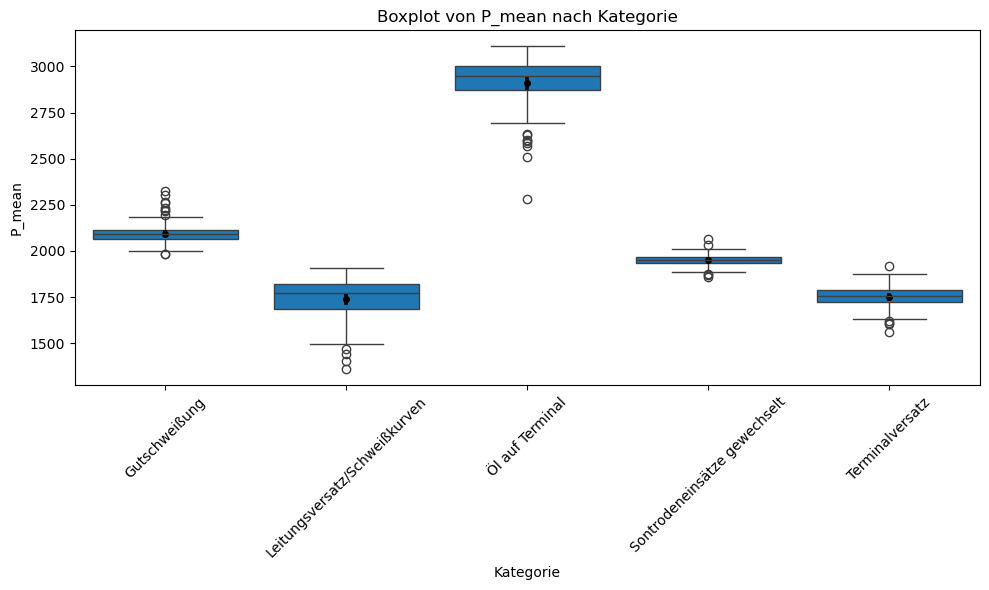

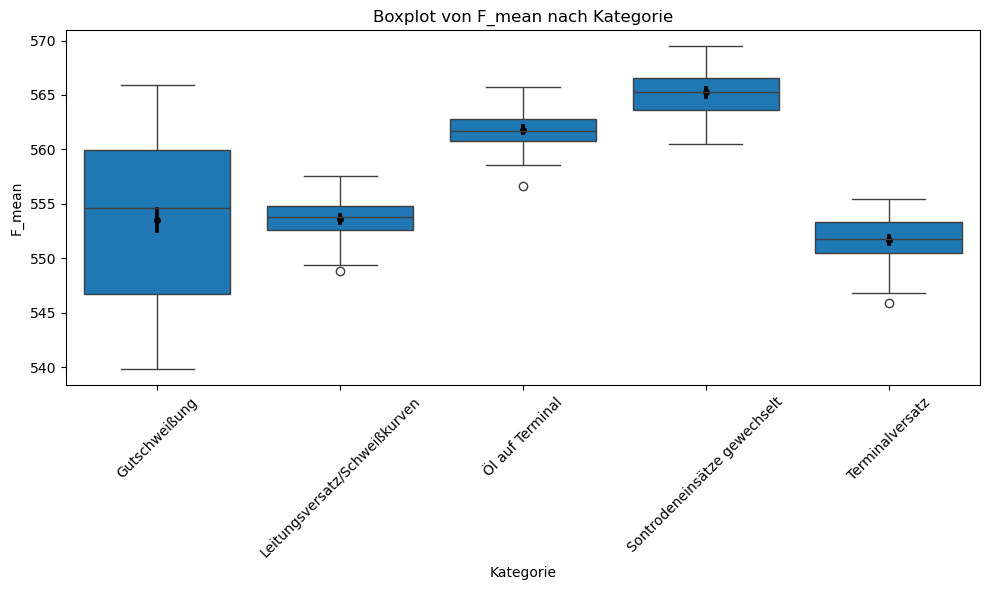

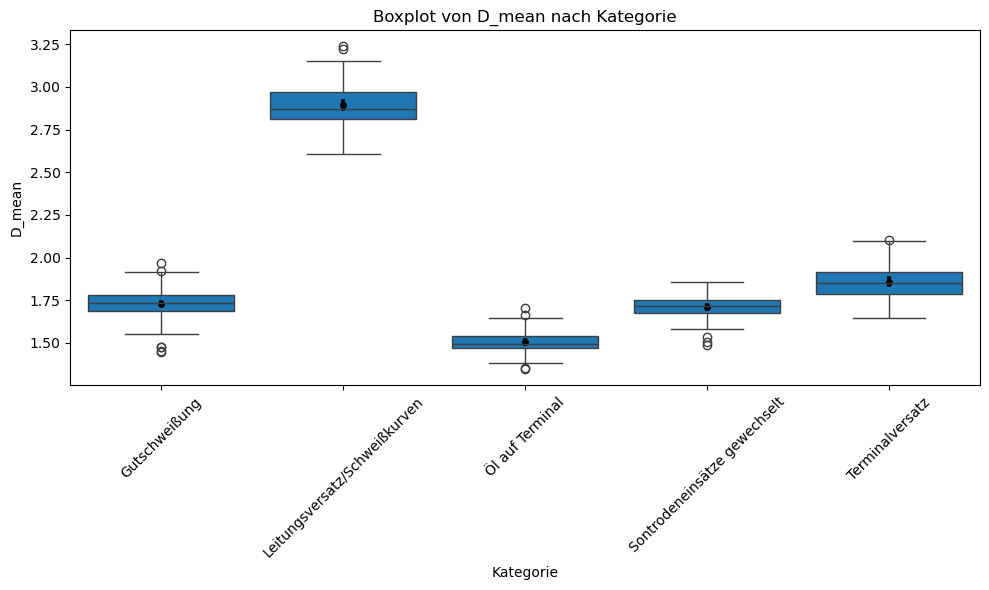

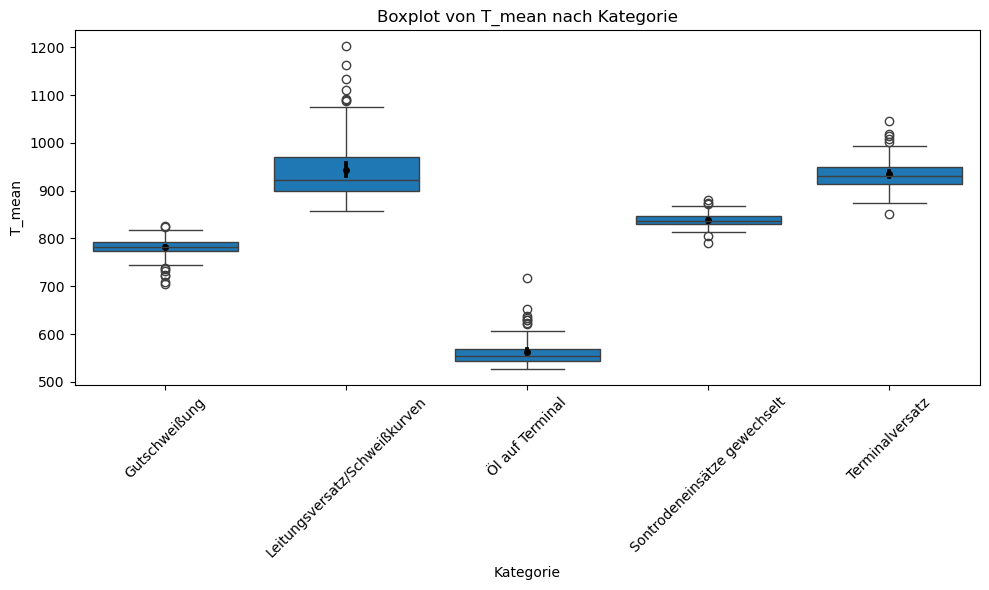

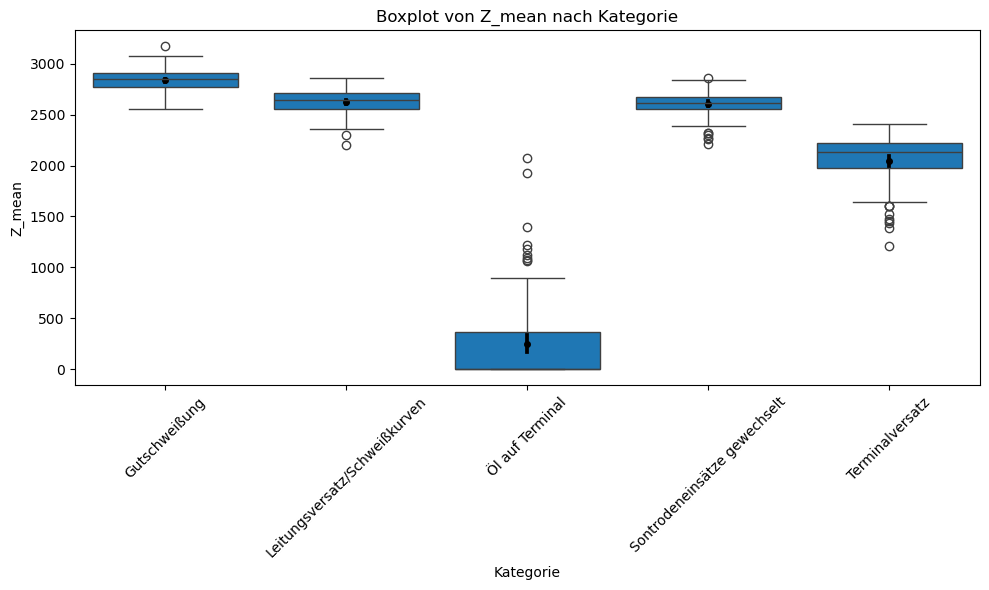

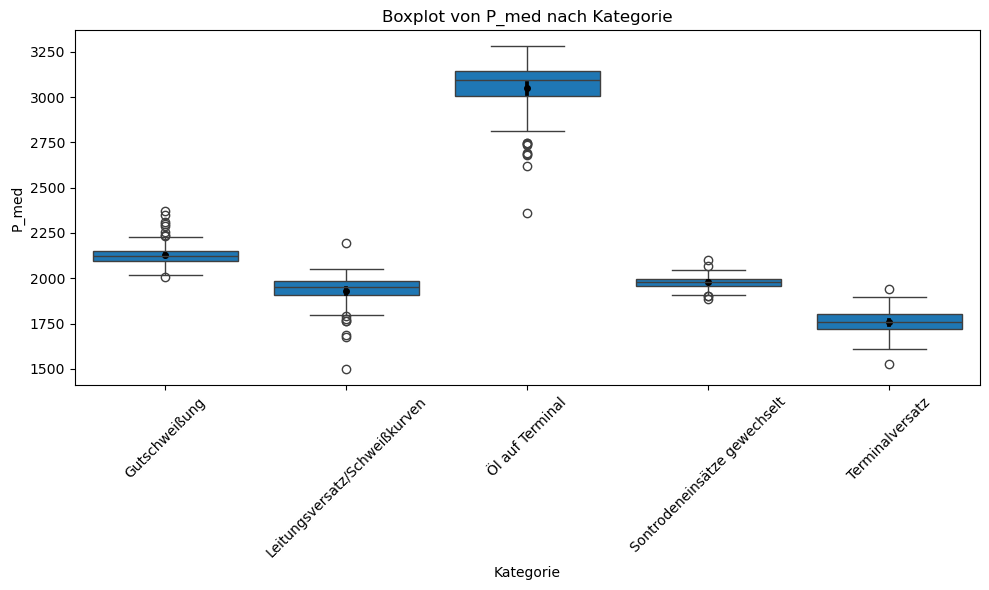

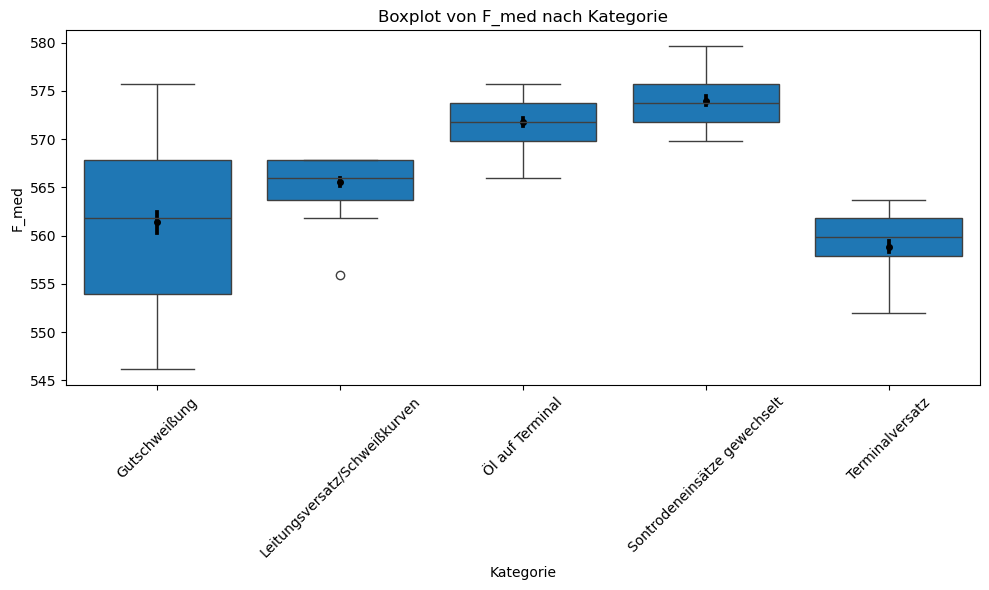

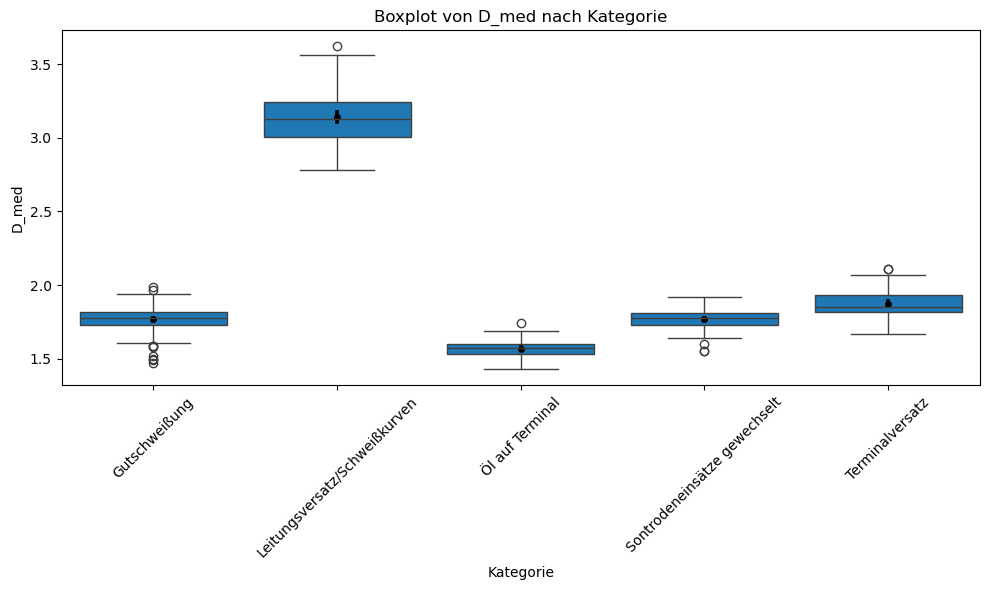

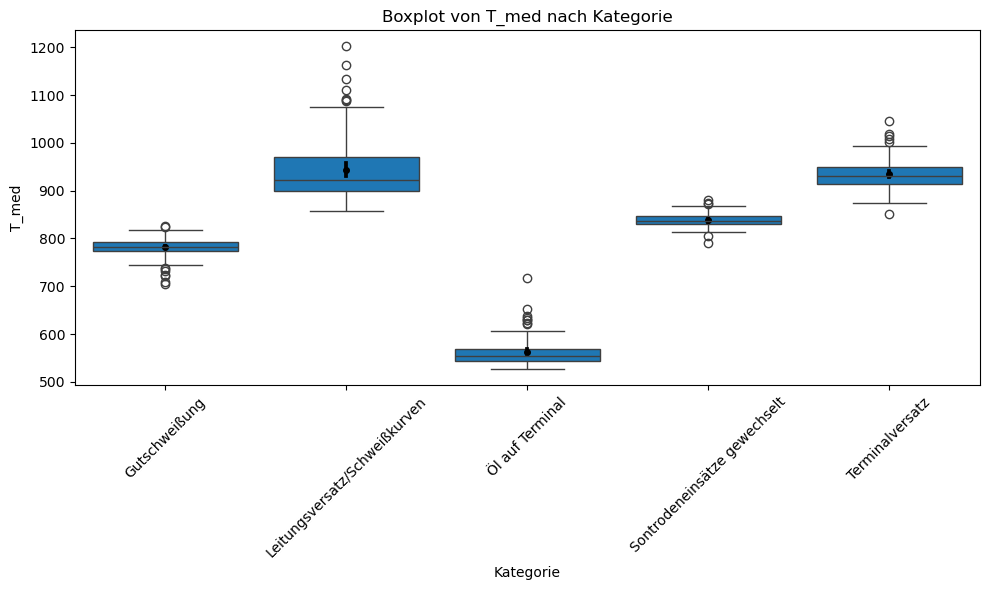

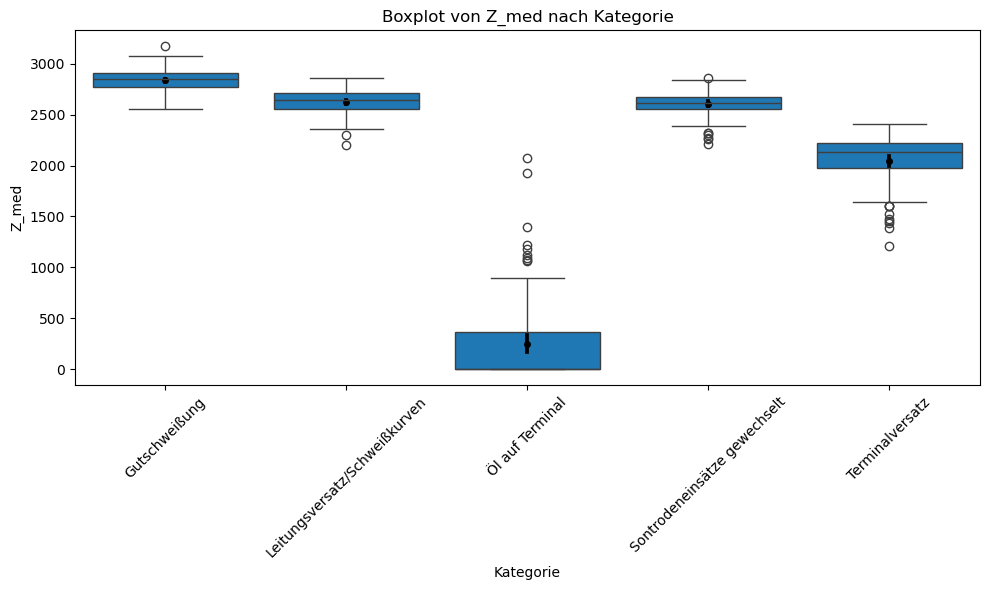

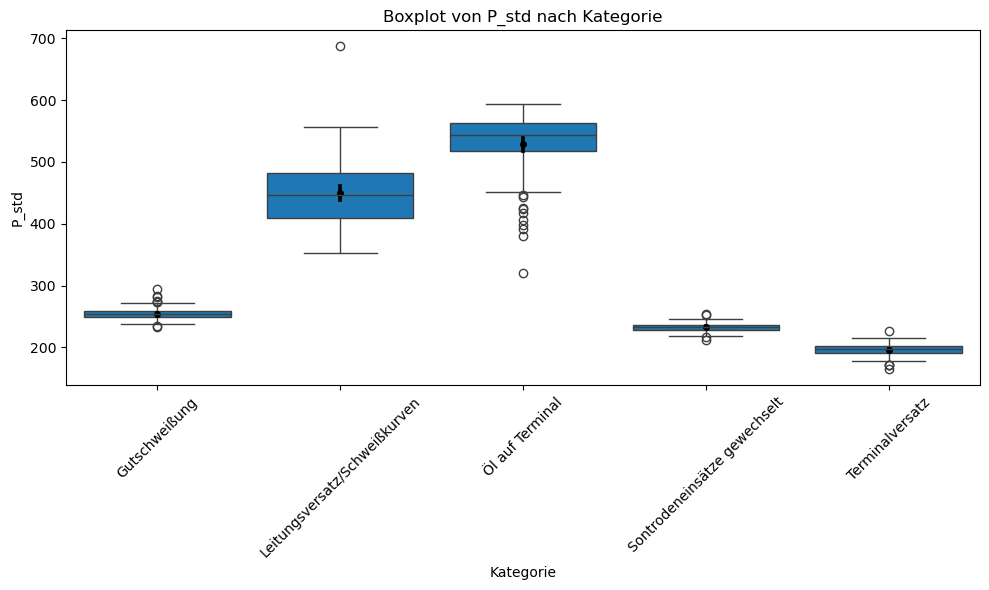

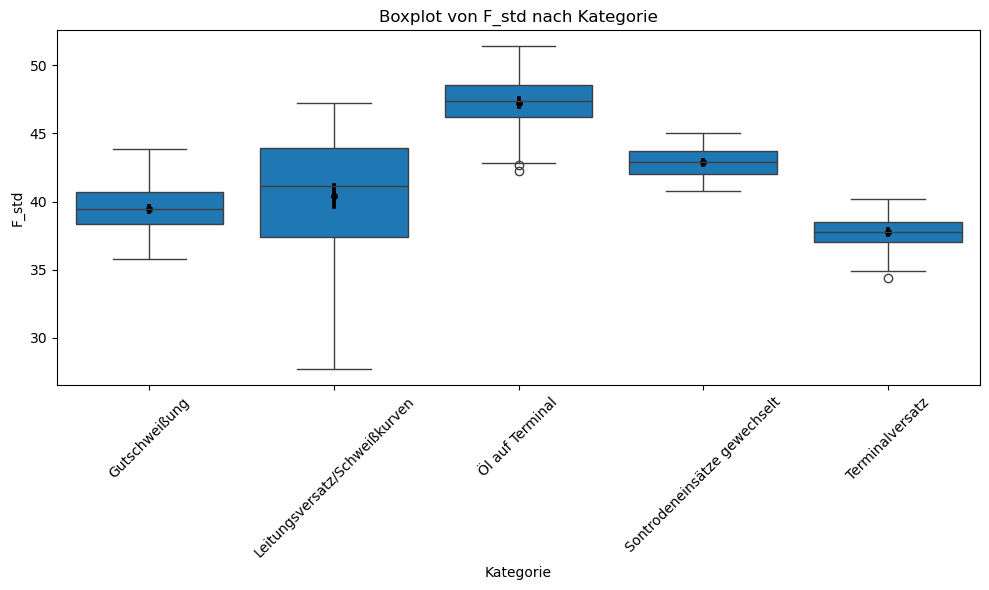

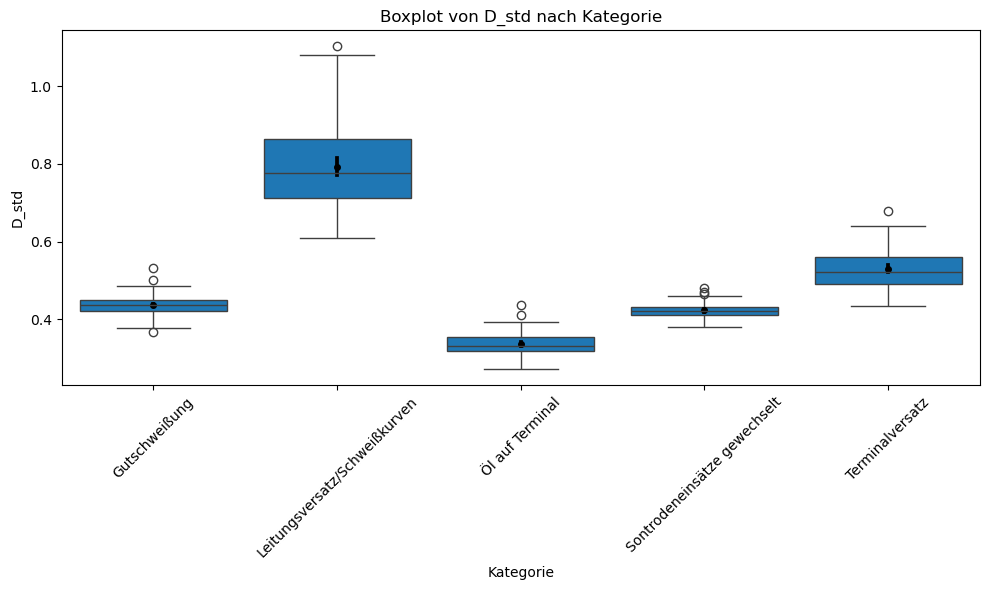

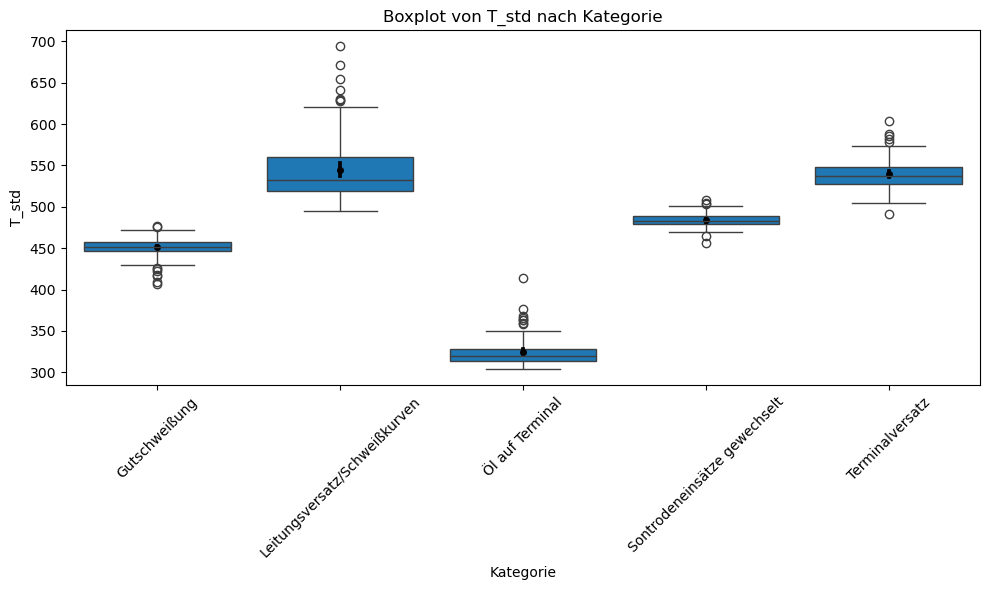

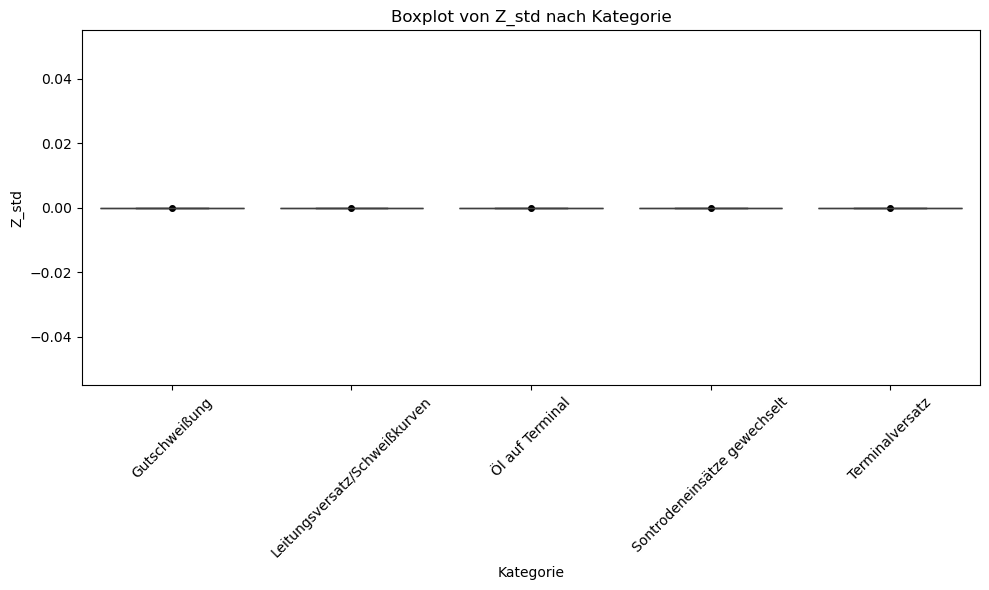

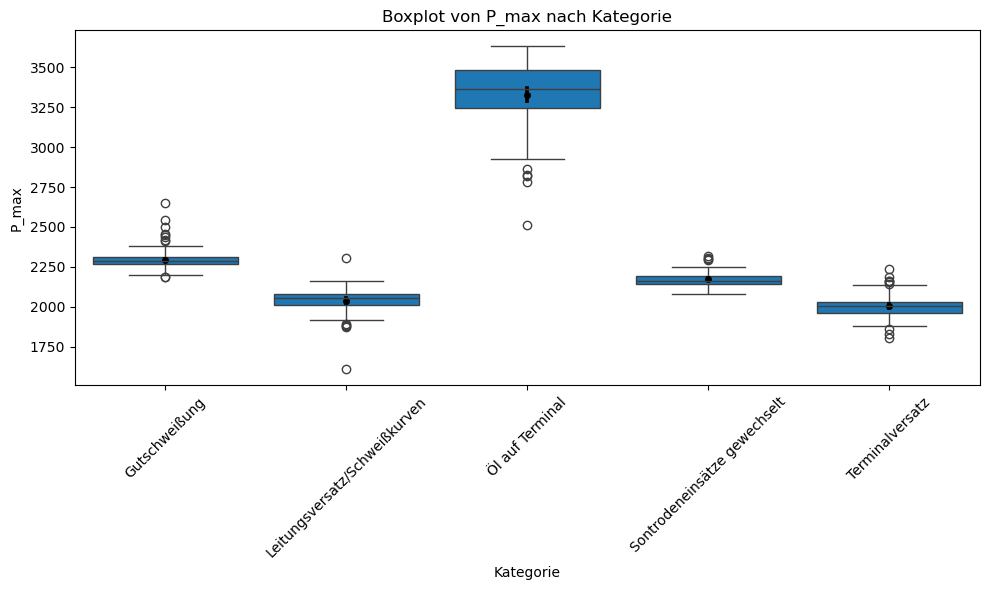

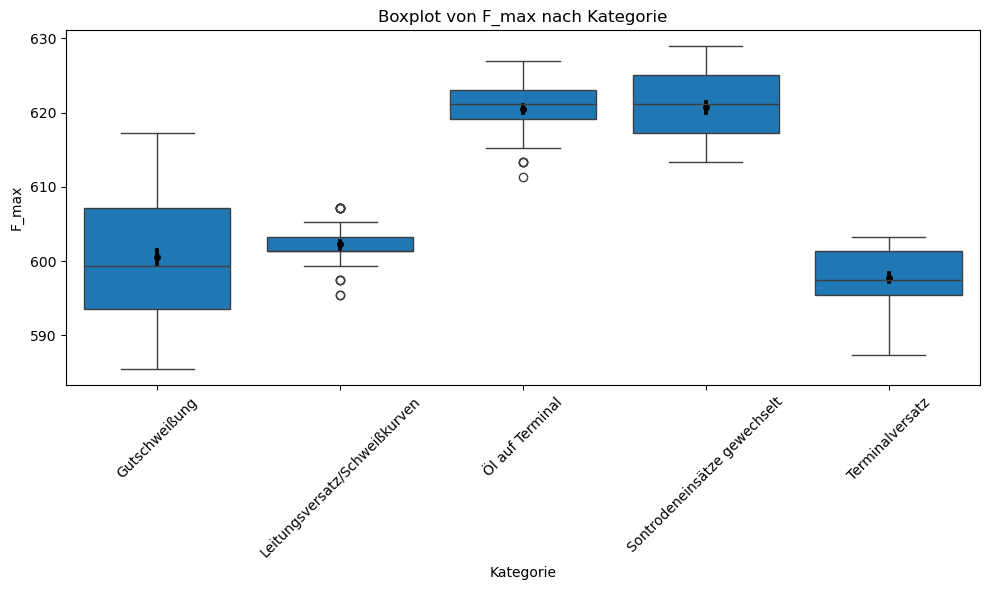

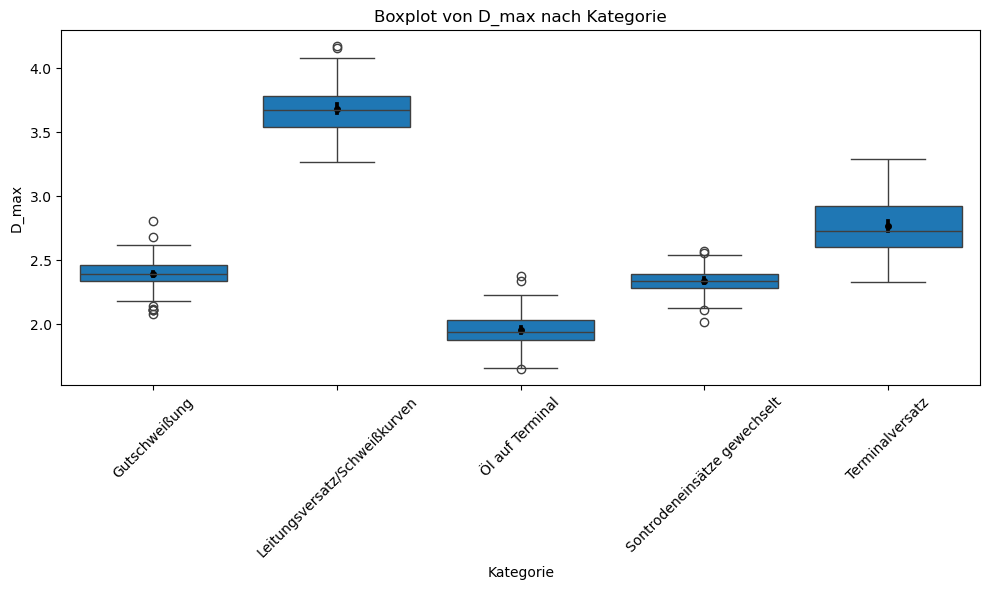

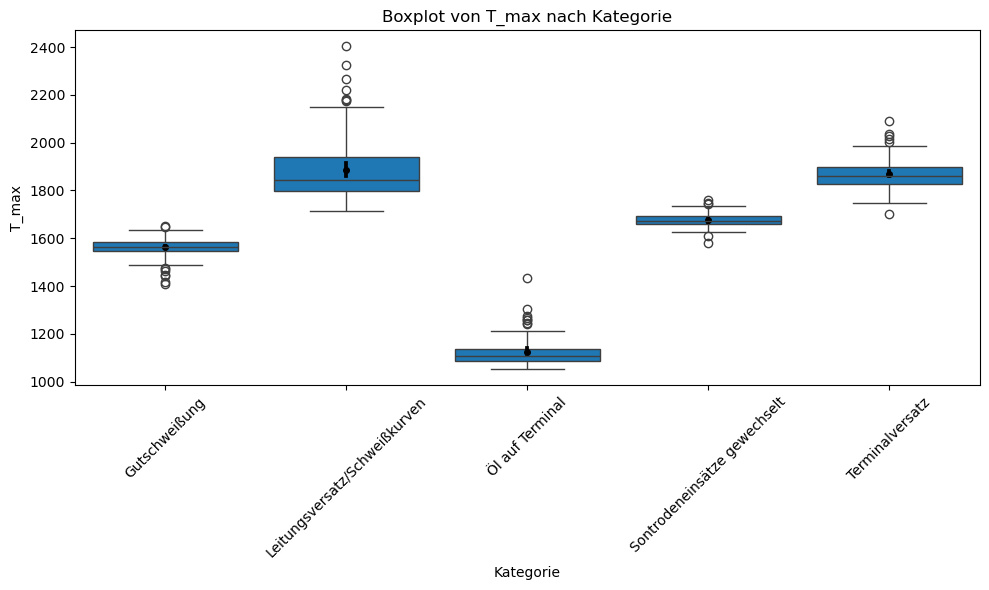

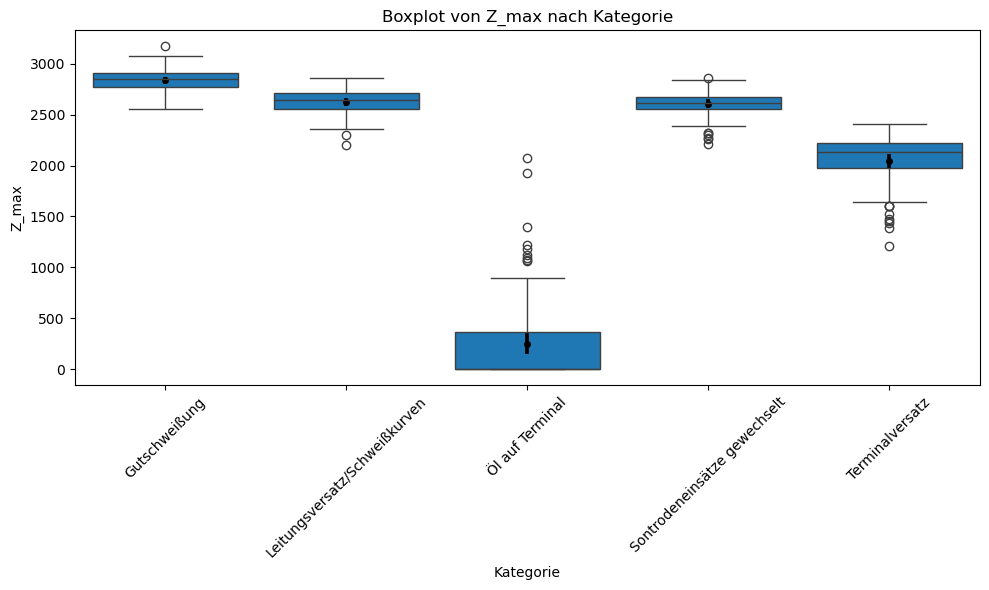

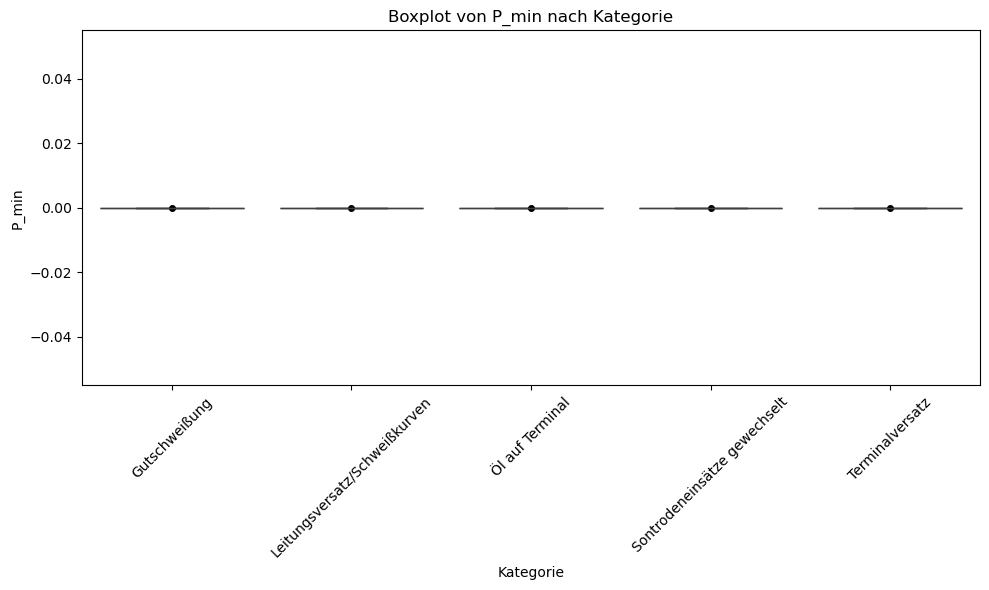

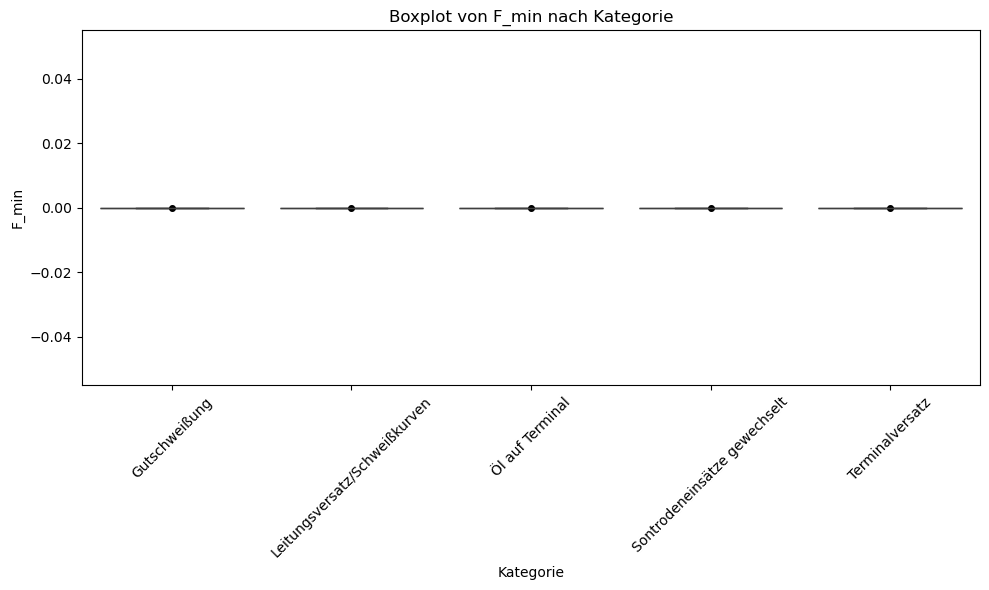

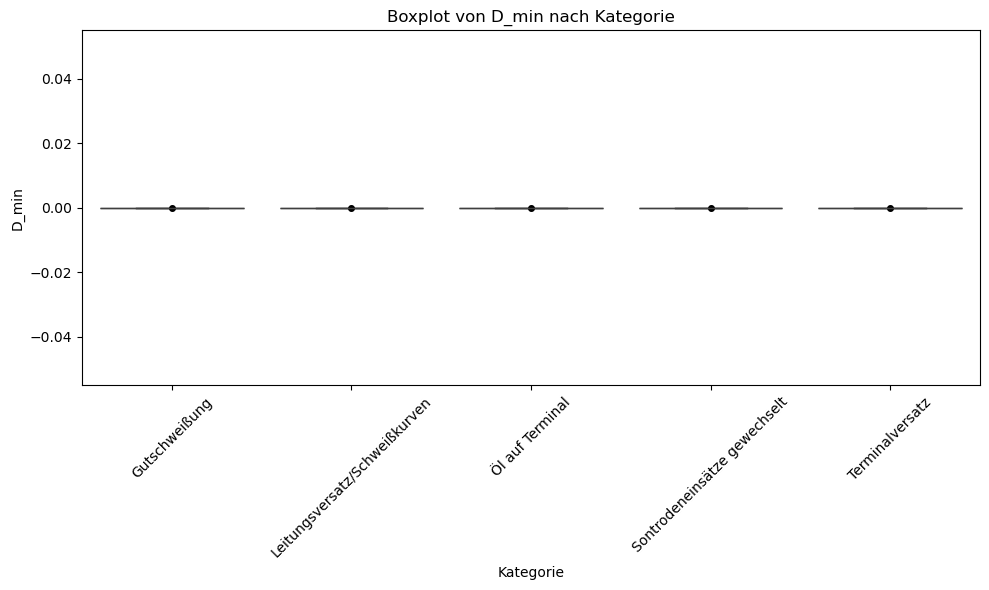

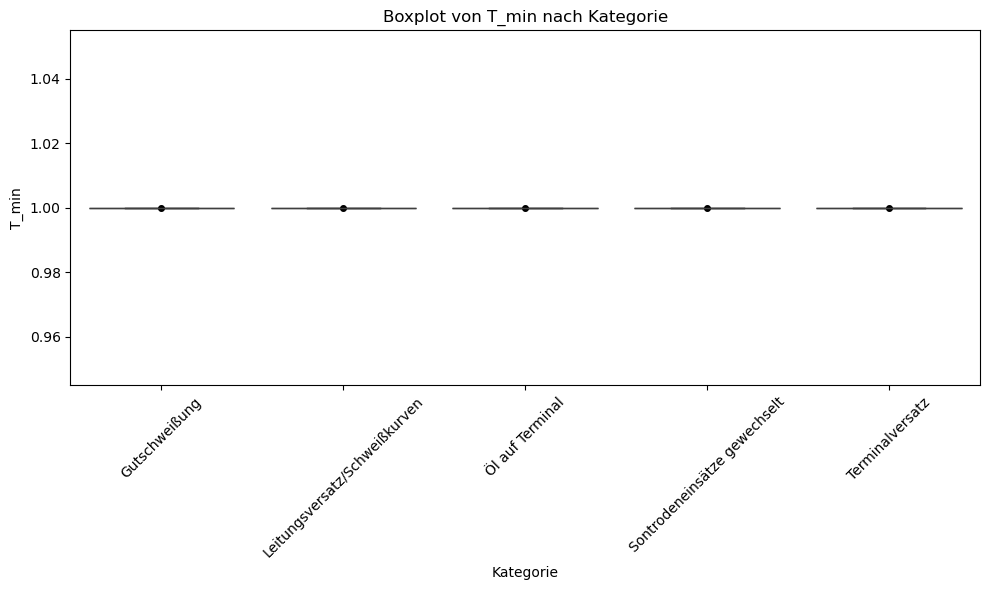

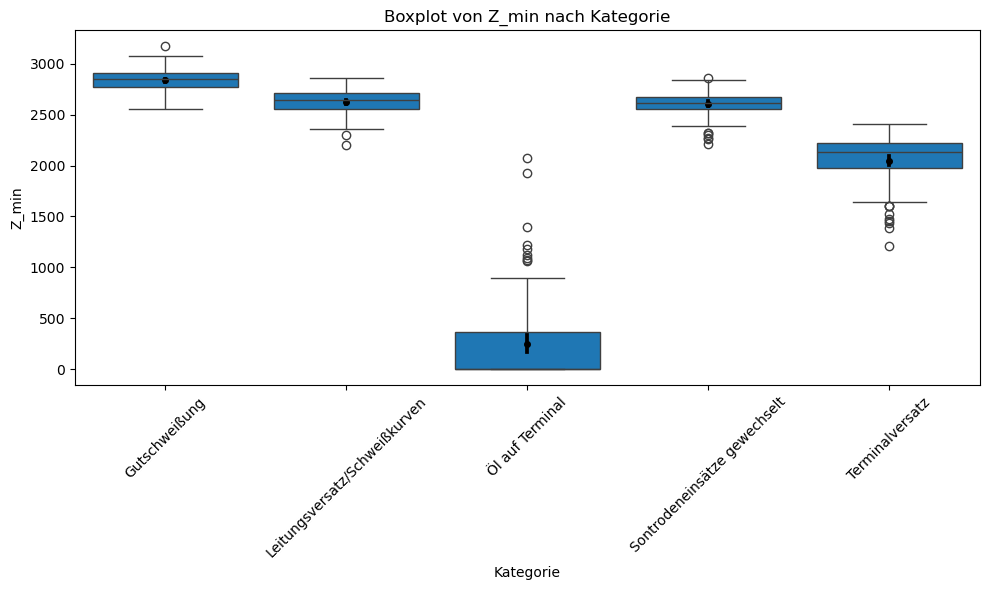

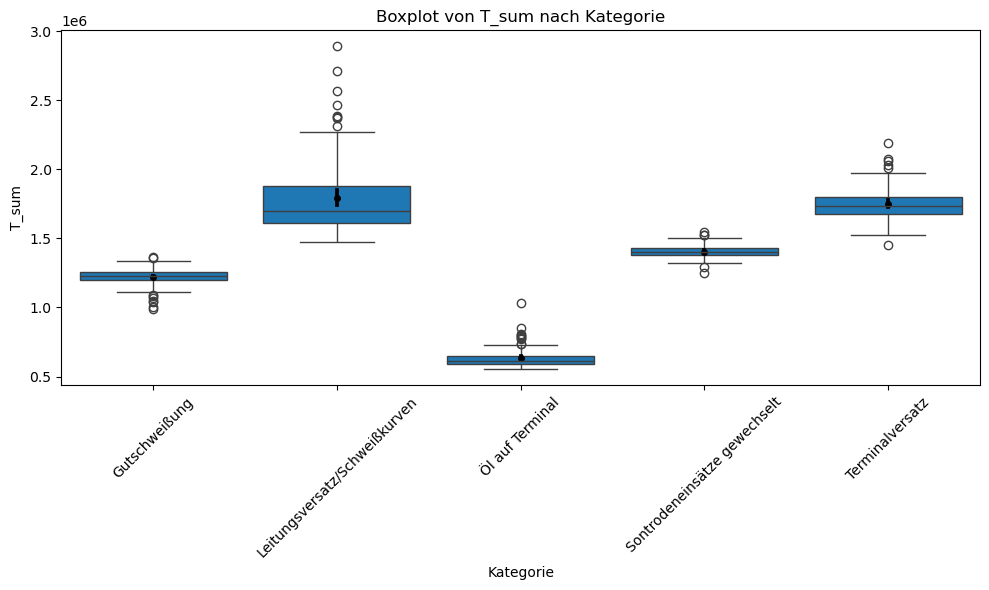

In [9]:
kategorien = [
    "Gutschweißung",
    "Leitungsversatz/Schweißkurven",
    "Öl auf Terminal",
    "Sontrodeneinsätze gewechselt",
    "Terminalversatz",
]
numerische_spalten = df_agg.select_dtypes(include=["float64", "int64"]).columns[1:]
for spalte in numerische_spalten:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_agg,
        x="Kategorie",
        y=spalte,
        order=kategorien,
        fill=kategorien,
        saturation=1,
    )
    sns.pointplot(
        data=df_agg,
        x="Kategorie",
        y=spalte,
        order=kategorien,
        color="black",
        linestyle="none",
        markersize=3,
    )
    plt.title(f"Boxplot von {spalte} nach Kategorie")
    plt.xlabel("Kategorie")
    plt.ylabel(spalte)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- Das Minimum eignet sich für keine der erstellten Spalten aus dem aggrierten Datensatz zur Klassifikation.
- 

In [10]:
numerische_spalten = df_agg.select_dtypes(include=["float64", "int64"]).columns[1:]
print(numerische_spalten)

Index(['P_mean', 'F_mean', 'D_mean', 'T_mean', 'Z_mean', 'P_med', 'F_med',
       'D_med', 'T_med', 'Z_med', 'P_std', 'F_std', 'D_std', 'T_std', 'Z_std',
       'P_max', 'F_max', 'D_max', 'T_max', 'Z_max', 'P_min', 'F_min', 'D_min',
       'T_min', 'Z_min', 'T_sum'],
      dtype='object')


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# Zeitlicher Verlauf der Versuche nach numerischen Spalten

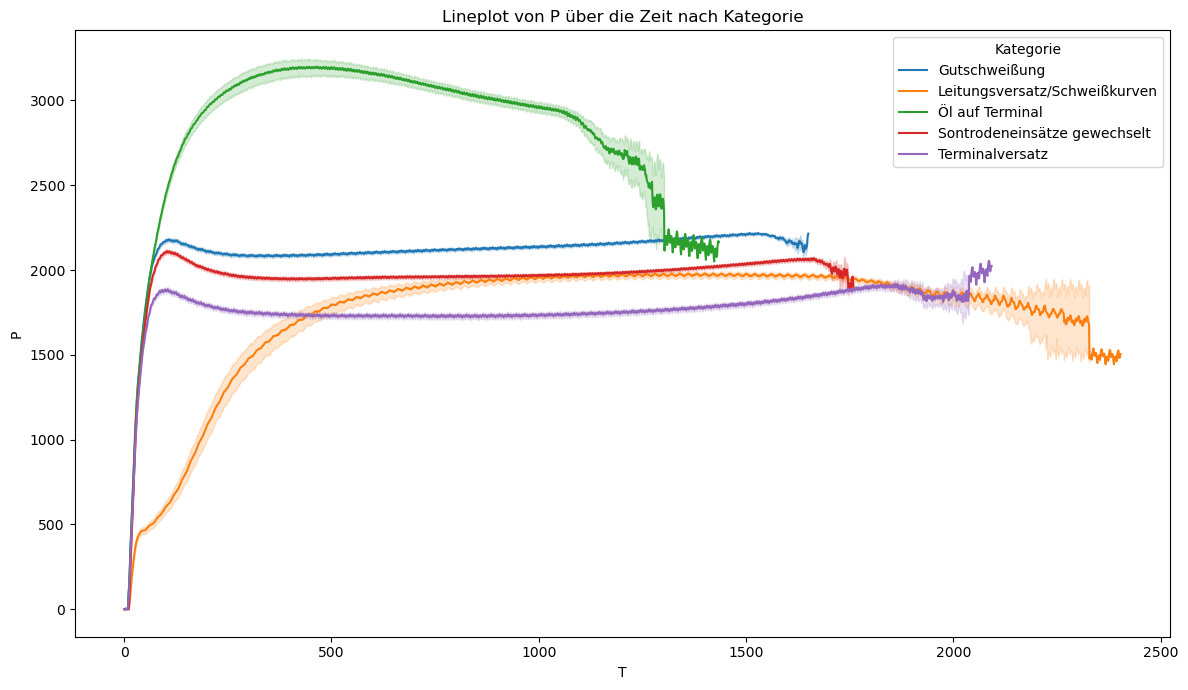

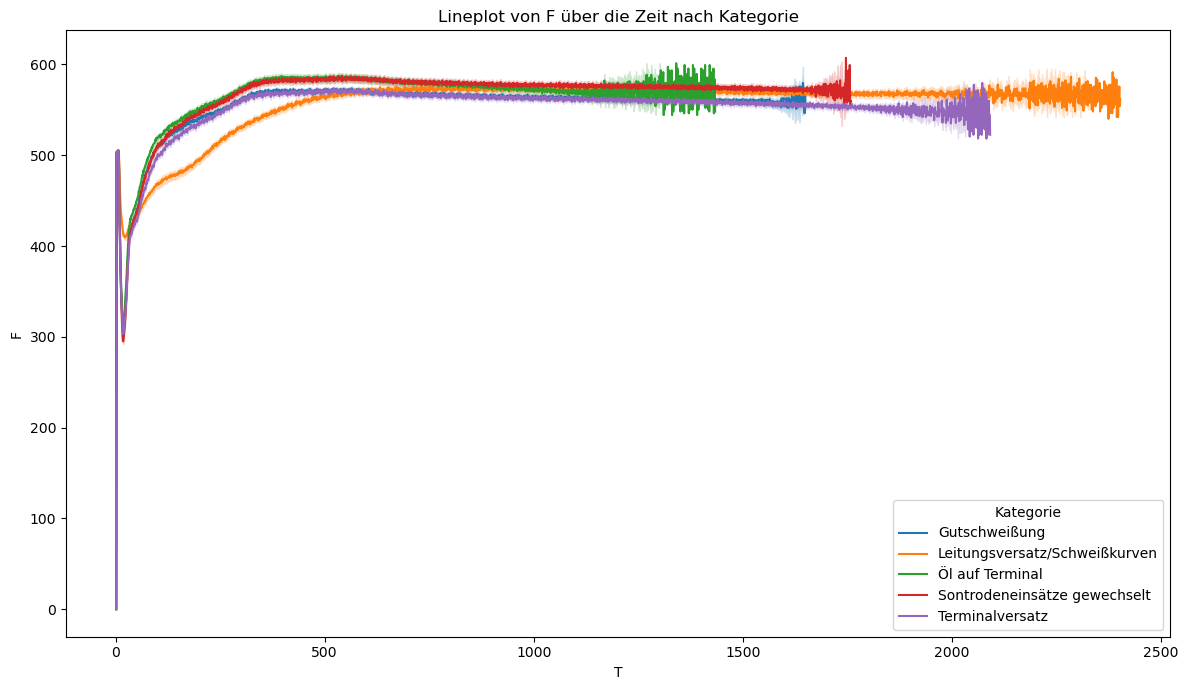

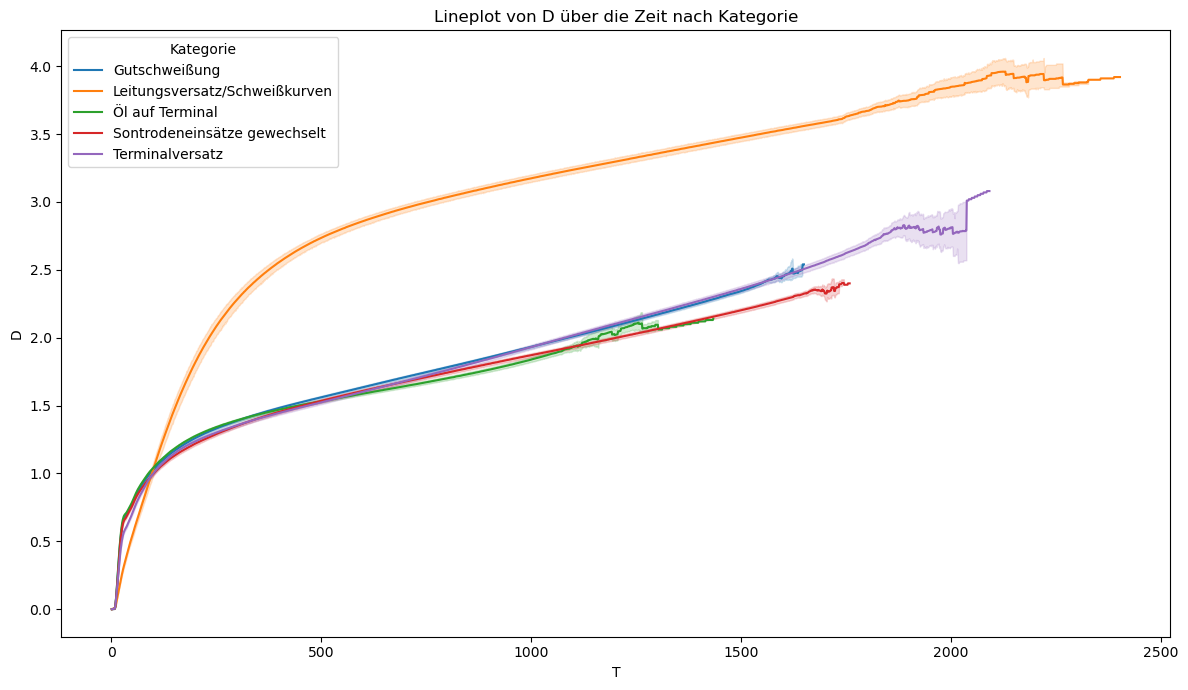

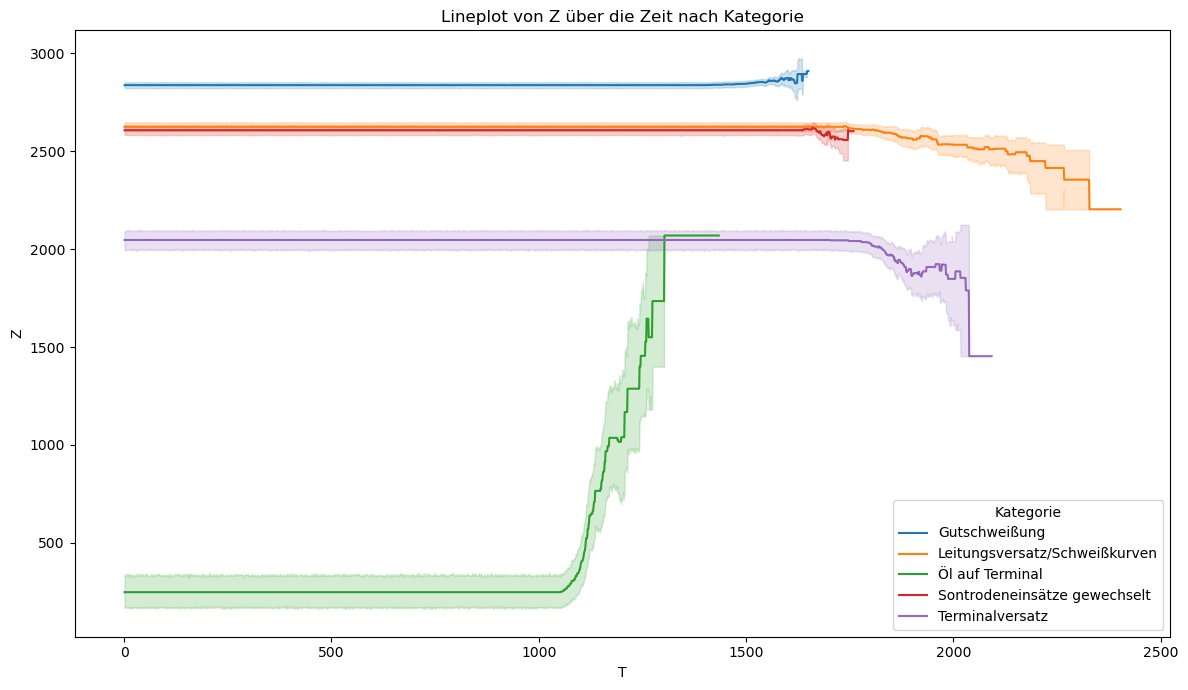

In [12]:
numerische_spalten = df_complete.select_dtypes(include=["float64", "int64"]).columns[1:]

for spalte in numerische_spalten:
    if spalte != "Experiment_ID":
        plt.figure(figsize=(12, 7))

        sns.lineplot(
            data=df_complete,
            x="T",
            y=spalte,
            hue="Kategorie",
            palette="tab10",
        )

        plt.title(f"Lineplot von {spalte} über die Zeit nach Kategorie")
        plt.xlabel("T")
        plt.ylabel(spalte)
        plt.legend(title="Kategorie")
        plt.tight_layout()
        plt.show()

# Verteilung der Zugfestigkeit der Experimente

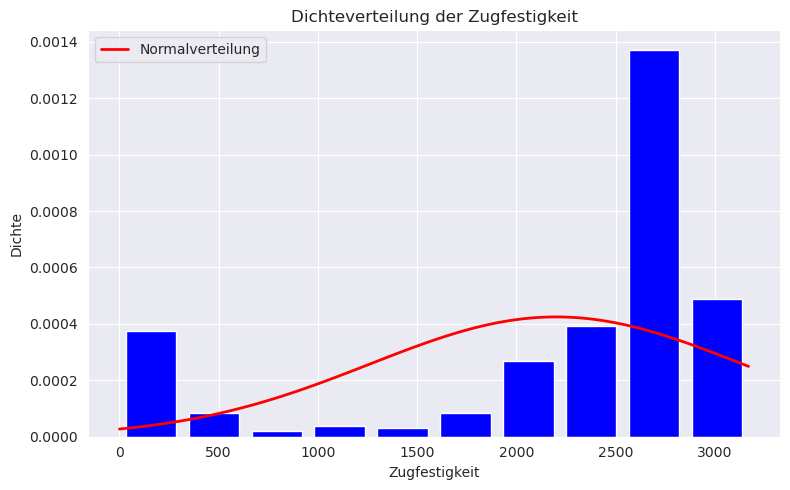

In [12]:
from help_functions import loadAggData
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

loader = loadAggData()

x, y = loader.return_agg_data_regression_x_y()

mu, std = norm.fit(y)
x = np.linspace(min(y), max(y), 100)
p = norm.pdf(x, mu, std)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 5))
ax.hist(y, bins=10, rwidth=0.8, color="blue", density=True)
ax.plot(x, p, color="red", linewidth=2, label="Normalverteilung")
ax.set_title("Dichteverteilung der Zugfestigkeit")
ax.set_xlabel("Zugfestigkeit")
ax.set_ylabel("Dichte")
ax.legend()
plt.tight_layout()
plt.show()



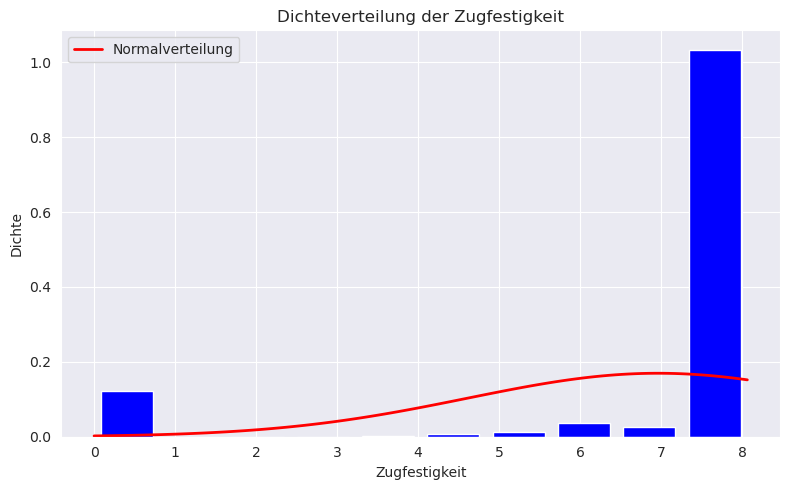

In [9]:
from help_functions import loadAggData
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

loader = loadAggData()

x, y = loader.return_agg_data_regression_x_y()
y = np.log(np.add(y, 1))
mu, std = norm.fit(y)
x = np.linspace(min(y), max(y), 100)
p = norm.pdf(x, mu, std)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 5))
ax.hist(y, bins=10, rwidth=0.8, color="blue", density=True)
ax.plot(x, p, color="red", linewidth=2, label="Normalverteilung")
ax.set_title("Dichteverteilung der Zugfestigkeit")
ax.set_xlabel("Zugfestigkeit")
ax.set_ylabel("Dichte")
ax.legend()
plt.tight_layout()
plt.show()



In [15]:
from scipy.stats import shapiro
from help_functions import loadAggData
loader = loadAggData()

x, y = loader.return_agg_data_regression_x_y()
stat, p = shapiro(y)
print(f"Shapiro-Wilk Teststatistik: {stat}")
print(f"P-Wert: {p}")



Shapiro-Wilk Teststatistik: 0.7084843746862963
P-Wert: 5.758568061150555e-31


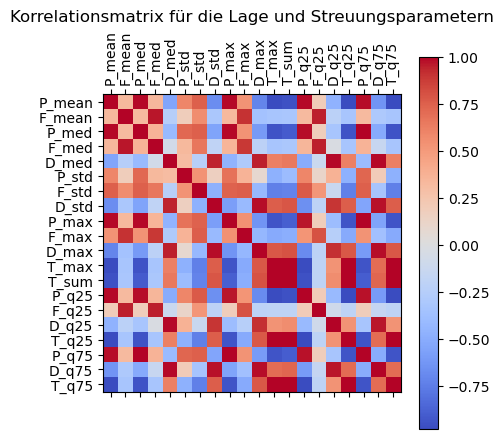

In [3]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
df = pd.read_csv("stat_features2.csv")

numerische_spalten = df[["P_mean","F_mean","P_med","F_med","D_med","P_std","F_std","D_std","P_max","F_max","D_max","T_max","T_sum","P_q25","F_q25","D_q25","T_q25","P_q75","D_q75","T_q75"]]
corr_matrix = numerische_spalten.corr()
plt.matshow(corr_matrix, cmap="coolwarm")
plt.xticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(corr_matrix.columns)), labels=corr_matrix.columns)
plt.title("Korrelationsmatrix für die Lage und Streuungsparametern")
plt.colorbar()
plt.show()

In [18]:
df_complete = pd.read_csv("complete_data.csv")
df_agg2 = df_complete.groupby(["Kategorie", "Experiment_ID"], as_index=False).agg(
    P_mean=("P", "mean"),
    F_mean=("F", "mean"),
    D_mean=("D", "mean"),
    T_mean=("T", "mean"),
    P_med=("P", "median"),
    F_med=("F", "median"),
    D_med=("D", "median"),
    T_med=("T", "median"),
    P_std=("P", "std"),
    F_std=("F", "std"),
    D_std=("D", "std"),
    T_std=("T", "std"),
    P_max=("P", "max"),
    F_max=("F", "max"),
    D_max=("D", "max"),
    T_max=("T", "max"),
    T_sum=("T", "sum"),
    P_q25=("P", lambda x: x.quantile(0.25)),
    F_q25=("F", lambda x: x.quantile(0.25)),
    D_q25=("D", lambda x: x.quantile(0.25)),
    T_q25=("T", lambda x: x.quantile(0.25)),
    P_q75=("P", lambda x: x.quantile(0.75)),
    F_q75=("F", lambda x: x.quantile(0.75)),
    D_q75=("D", lambda x: x.quantile(0.75)),
    T_q75=("T", lambda x: x.quantile(0.75)),
)

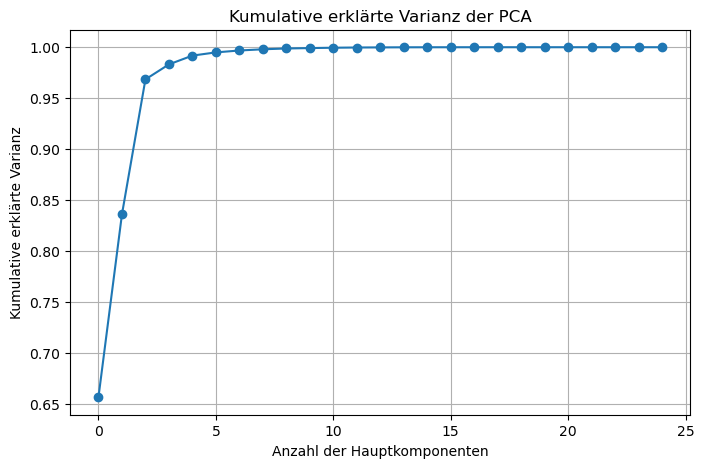

Anzahl der Hauptkomponenten, um 90% der Varianz zu erklären: 3
Anzahl der Hauptkomponenten, um 97,5% der Varianz zu erklären: 4


In [31]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
scaler = StandardScaler()

numerische_spalten = df[[
            "P_mean",
            "F_mean",
            "D_mean",
            "T_mean",
            "P_med",
            "F_med",
            "D_med",
            "T_med",
            "P_std",
            "F_std",
            "D_std",
            "T_std",
            "P_max",
            "F_max",
            "D_max",
            "T_max",
            "T_sum",
            "P_q25",
            "F_q25",
            "D_q25",
            "T_q25",
            "P_q75",
            "F_q75",
            "D_q75",
            "T_q75",
        ]]
x_scaled = scaler.fit_transform(numerische_spalten)
pca = PCA(n_components=None)  
X_pca = pca.fit_transform(x_scaled)


explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz der PCA')
plt.grid()
plt.show()

optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.9) + 1
print(f"Anzahl der Hauptkomponenten, um 90% der Varianz zu erklären: {optimal_components}")
optimal_components = np.argmax(np.cumsum(explained_variance) >= 0.975) + 1
print(f"Anzahl der Hauptkomponenten, um 97,5% der Varianz zu erklären: {optimal_components}")

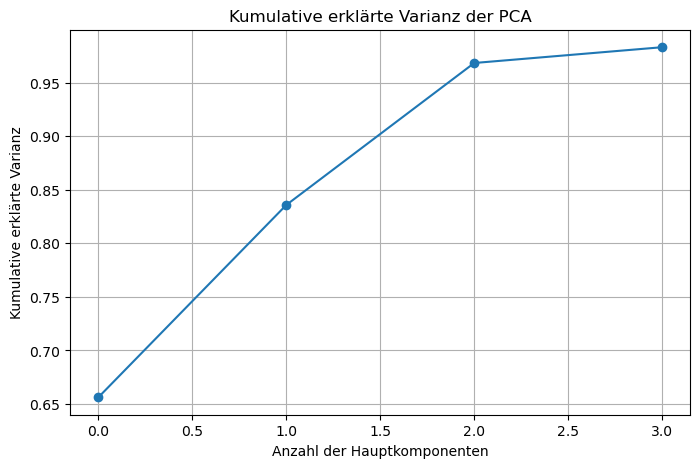

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
scaler = StandardScaler()

numerische_spalten = df[[
            "P_mean",
            "F_mean",
            "D_mean",
            "T_mean",
            "P_med",
            "F_med",
            "D_med",
            "T_med",
            "P_std",
            "F_std",
            "D_std",
            "T_std",
            "P_max",
            "F_max",
            "D_max",
            "T_max",
            "T_sum",
            "P_q25",
            "F_q25",
            "D_q25",
            "T_q25",
            "P_q75",
            "F_q75",
            "D_q75",
            "T_q75",
        ]]
x_scaled = scaler.fit_transform(numerische_spalten)
pca = PCA(n_components=4)  
X_pca = pca.fit_transform(x_scaled)


explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Anzahl der Hauptkomponenten')
plt.ylabel('Kumulative erklärte Varianz')
plt.title('Kumulative erklärte Varianz der PCA')
plt.grid()
plt.show()



In [33]:
joblib.dump(scaler, "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/GUI USS Projekt/Modelle/standardscaler.pkl")
joblib.dump(pca, "/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/GUI USS Projekt/Modelle/pca.pkl")

['/home/david/Dokumente/Buisness_Intellegence_&_Analytics/Forschungprojekt/GUI USS Projekt/Modelle/pca.pkl']